# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 74.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_hh_income.shape
df_hh_income.columns
df_hh_income.isna().sum() #51
df_hh_income.duplicated().sum()

0

###converting from object to float or int type ###

In [ ]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [ ]:
df_pct_poverty['poverty_rate'] =df_pct_poverty['poverty_rate'].apply(lambda x:str(x).replace('-','0')).astype('float64')

In [ ]:
df_pct_completed_hs.shape
df_pct_completed_hs.columns
df_pct_completed_hs.isna().sum() #0
df_pct_completed_hs.duplicated().sum()

0

In [ ]:
df_pct_poverty.shape
df_pct_poverty.columns
df_pct_poverty.isna().sum() #0
df_pct_poverty.duplicated().sum()

0

In [ ]:
df_share_race_city.shape
df_share_race_city.columns
df_share_race_city.isna().sum() #0
df_share_race_city.duplicated().sum()

0

In [ ]:
df_fatalities.shape
df_fatalities.columns
df_fatalities.isna().sum() #77 , 195 , 65
df_fatalities.duplicated().sum()

0

In [ ]:
all_in_one = [df_hh_income, df_pct_poverty, df_pct_completed_hs, df_share_race_city, df_fatalities]

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
for all in all_in_one:
  all.fillna(0, inplace=True)

In [ ]:
df_fatalities.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [ ]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [ ]:
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].apply(lambda x:str(x).replace('-','0')).astype('float64')

In [ ]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [ ]:
# df_share_race_city['share_asian'] = df_share_race_city['share_asian'].apply(lambda x: str(x).replace('(x)','0')).astype('float64')

# df_share_race_city['share_black'] = df_share_race_city['share_black'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
# df_share_race_city['share_american'] = df_share_race_city['share_american'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
# # df_share_race_city['share_asian'] = df_share_race_city['share_asian'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
# df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')

In [ ]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2535 non-null   object 
 5   age                      2535 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2535 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2535 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [ ]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty.head(2)

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.80
1,AL,Abbeville city,29.10


In [ ]:
df_pct_poverty['Geographic Area'].nunique()

51

In [ ]:
 poverty = df_pct_poverty.groupby('Geographic Area').agg({'poverty_rate':'mean'})

In [ ]:
poverty.sort_values(by='poverty_rate', inplace=True)

Text(0, 0.5, 'Poverty Level')

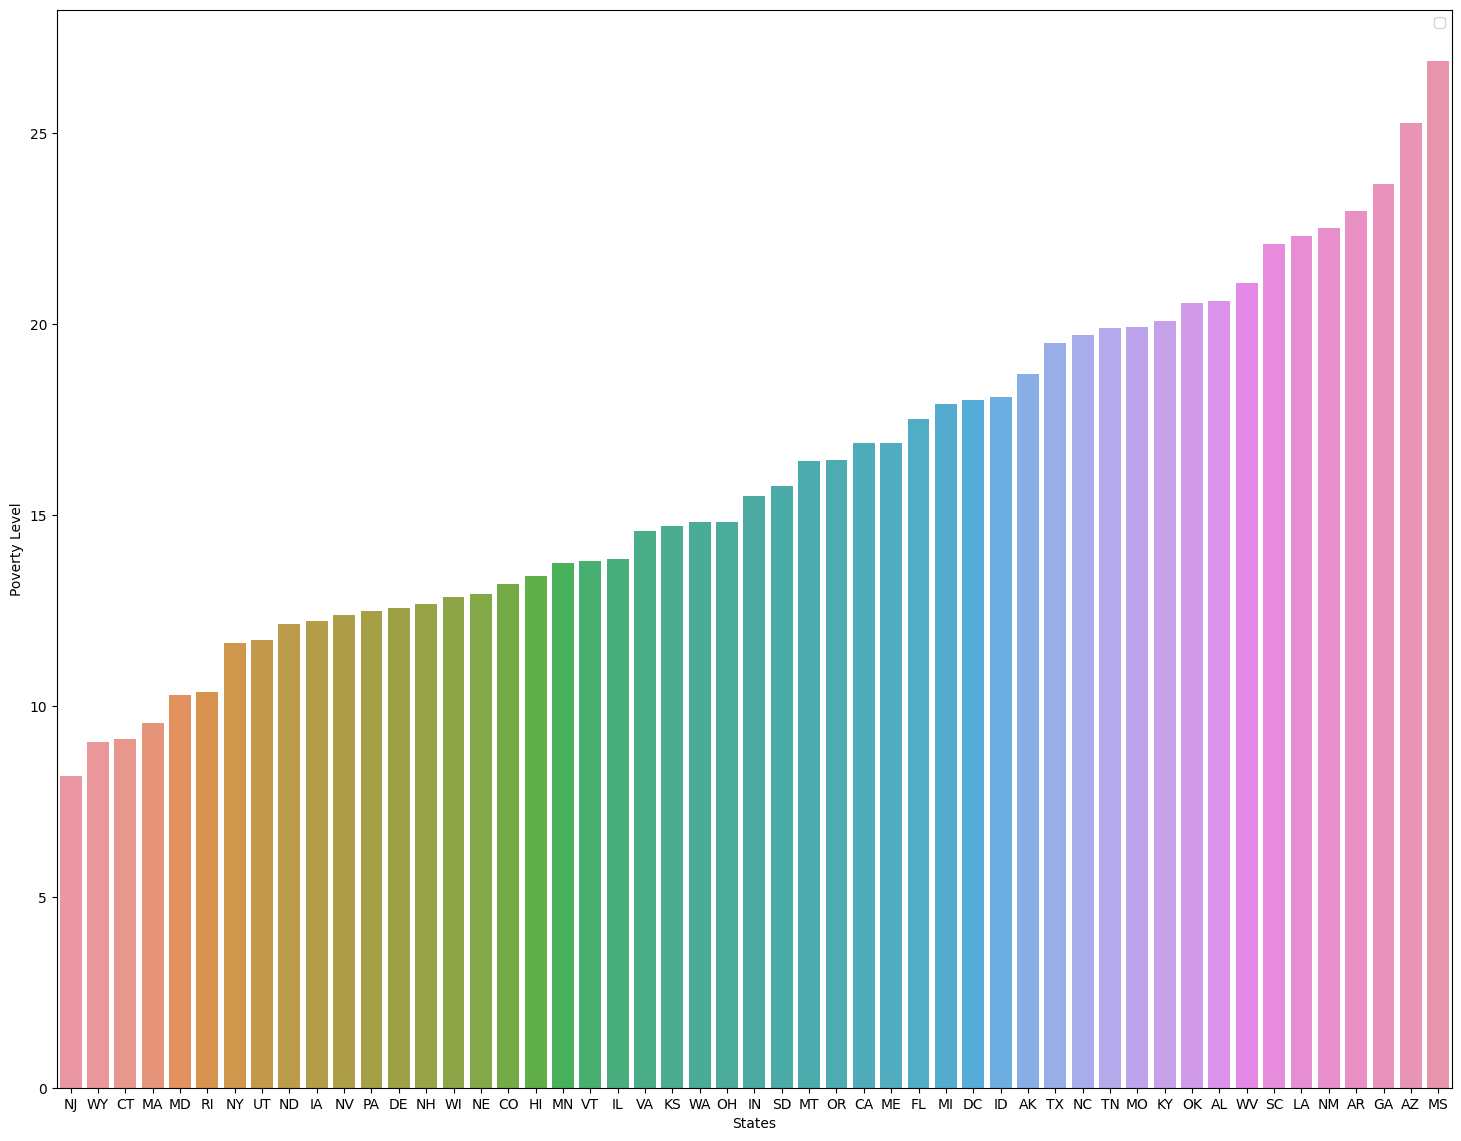

In [ ]:
plt.figure(figsize=(18,14))
sns.barplot(data=poverty, x=poverty.index, y=poverty['poverty_rate'])
plt.xlabel('States')
plt.legend()
# plt.xticks(poverty.index)
plt.ylabel('Poverty Level')

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
high_school_grad = df_pct_completed_hs.groupby('Geographic Area').agg({'percent_completed_hs':'mean'})

In [ ]:
high_school_grad.sort_values(by='percent_completed_hs', inplace=True)

Text(0, 0.5, 'graduation_rate')

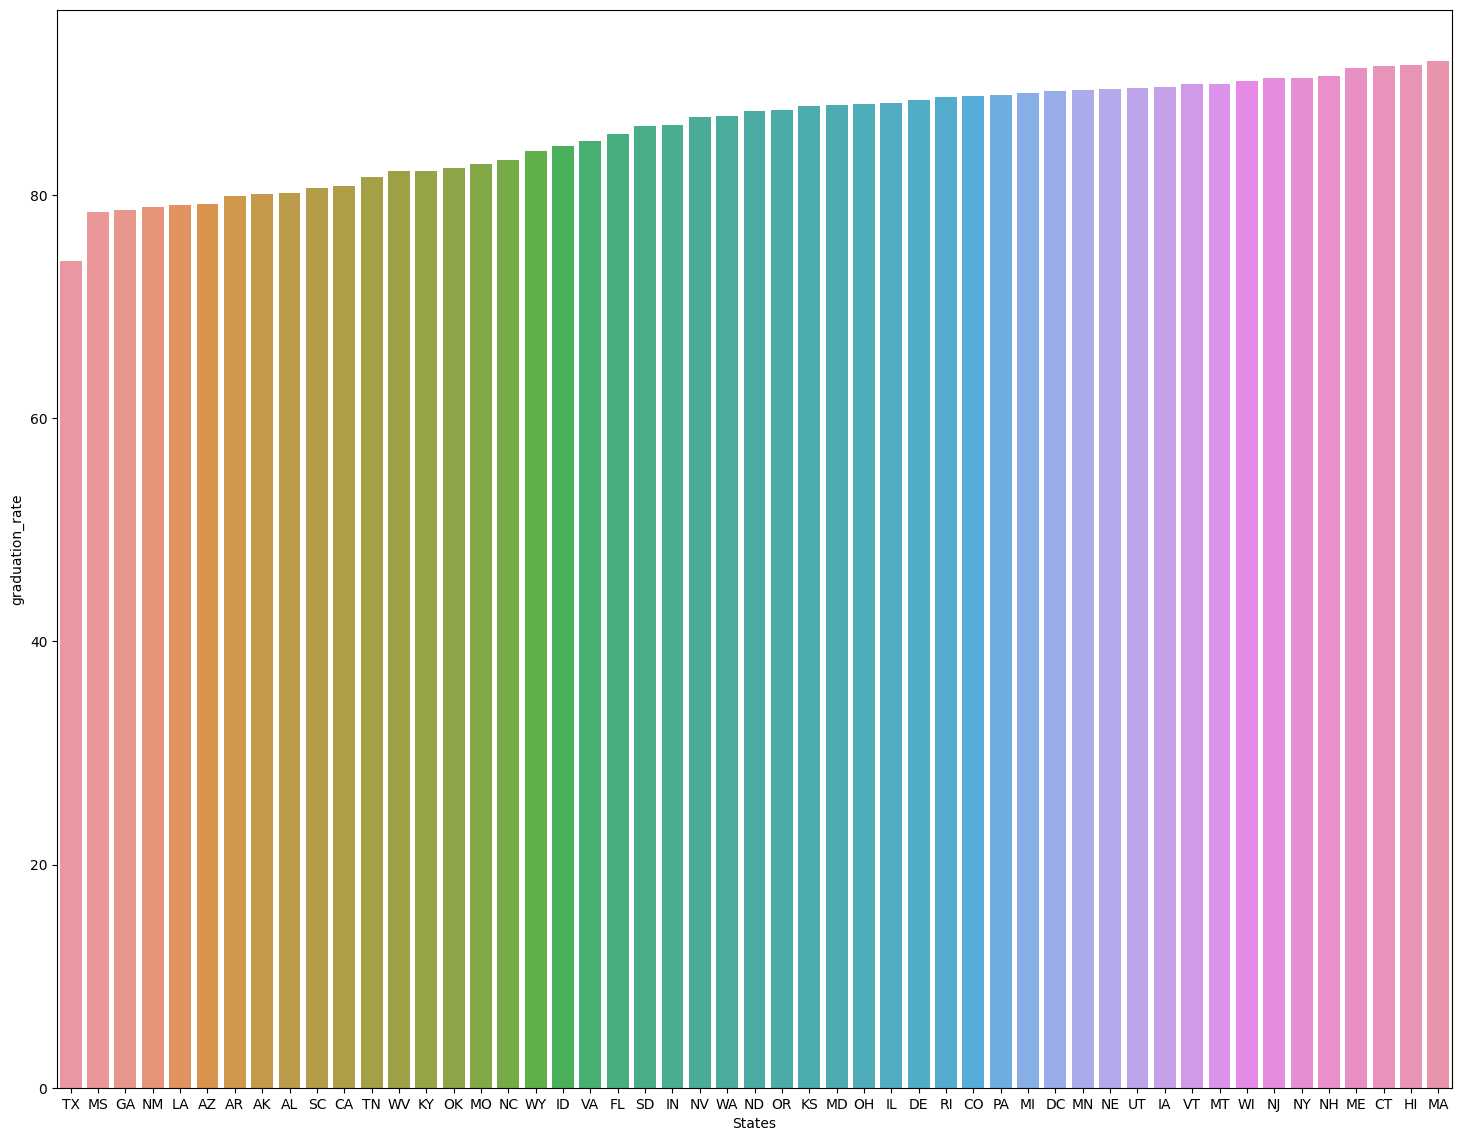

In [ ]:
plt.figure(figsize=(18,14))
sns.barplot(data=high_school_grad, x=high_school_grad.index, y=high_school_grad['percent_completed_hs'])
plt.xlabel('States')
plt.ylabel('graduation_rate')

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
relationship = pd.merge(poverty, high_school_grad, on='Geographic Area', how='inner')

<Axes: xlabel='Geographic Area', ylabel='poverty_rate'>

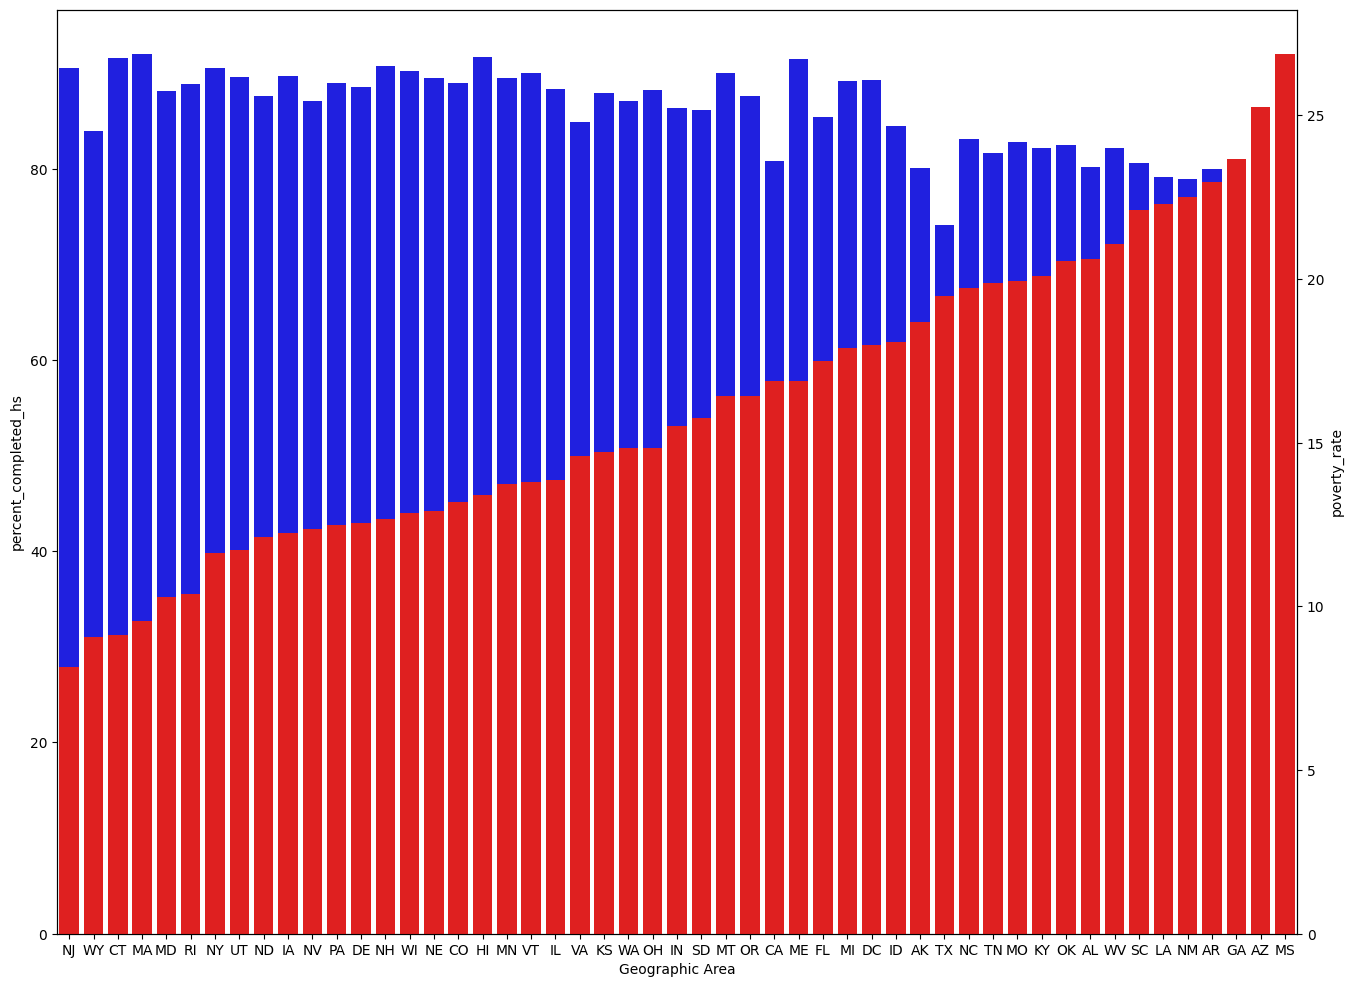

In [ ]:
plt.figure(figsize=(16,12))
ax1=sns.barplot(data=relationship, x=relationship.index, y=relationship['percent_completed_hs'], color='blue')

ax2 = ax1.twinx()

sns.barplot(data=relationship, x=relationship.index, y=relationship['poverty_rate'], ax=ax2, color='red')

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

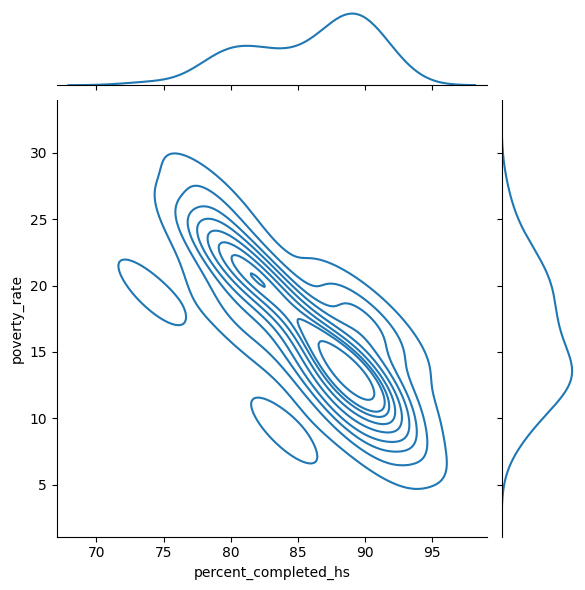

In [ ]:
sns.jointplot(data=relationship, x=relationship['percent_completed_hs'], y=poverty['poverty_rate'], kind='kde')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

<Axes: xlabel='percent_completed_hs', ylabel='poverty_rate'>

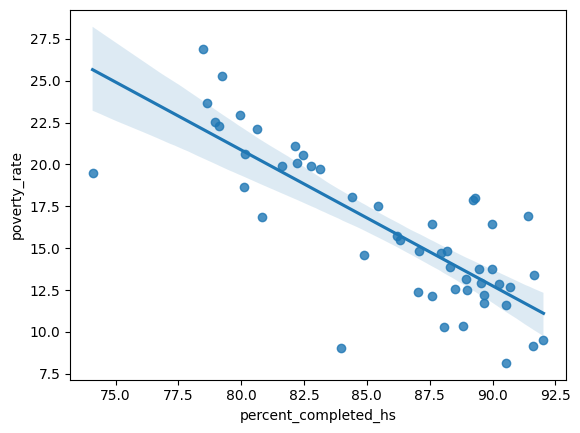

In [ ]:
sns.regplot(data=relationship, x='percent_completed_hs', y='poverty_rate')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [ ]:
df_share_race_city['share_asian'] = df_share_race_city['share_asian'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_black'] = df_share_race_city['share_black'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_white'] = df_share_race_city['share_white'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29268 non-null  float64
 3   share_black            29268 non-null  float64
 4   share_native_american  29268 non-null  float64
 5   share_asian            29268 non-null  float64
 6   share_hispanic         29268 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [ ]:
race_by_state = df_share_race_city.groupby('Geographic area')[['share_white','share_black','share_native_american', 'share_asian', 'share_hispanic']].sum()

In [ ]:
sum_per_state = race_by_state['share_asian'] + race_by_state['share_black'] + race_by_state['share_hispanic'] + race_by_state['share_native_american'] + race_by_state['share_white']
race_by_state['share_asian'] = race_by_state['share_asian'] / sum_per_state * 100
race_by_state['share_black'] = race_by_state['share_black'] / sum_per_state * 100
race_by_state['share_hispanic'] = race_by_state['share_hispanic'] / sum_per_state * 100
race_by_state['share_native_american'] = race_by_state['share_native_american'] / sum_per_state * 100
race_by_state['share_white'] = race_by_state['share_white'] / sum_per_state * 100

<Axes: title={'center': 'Share of Race by State'}, xlabel='Geographic area'>

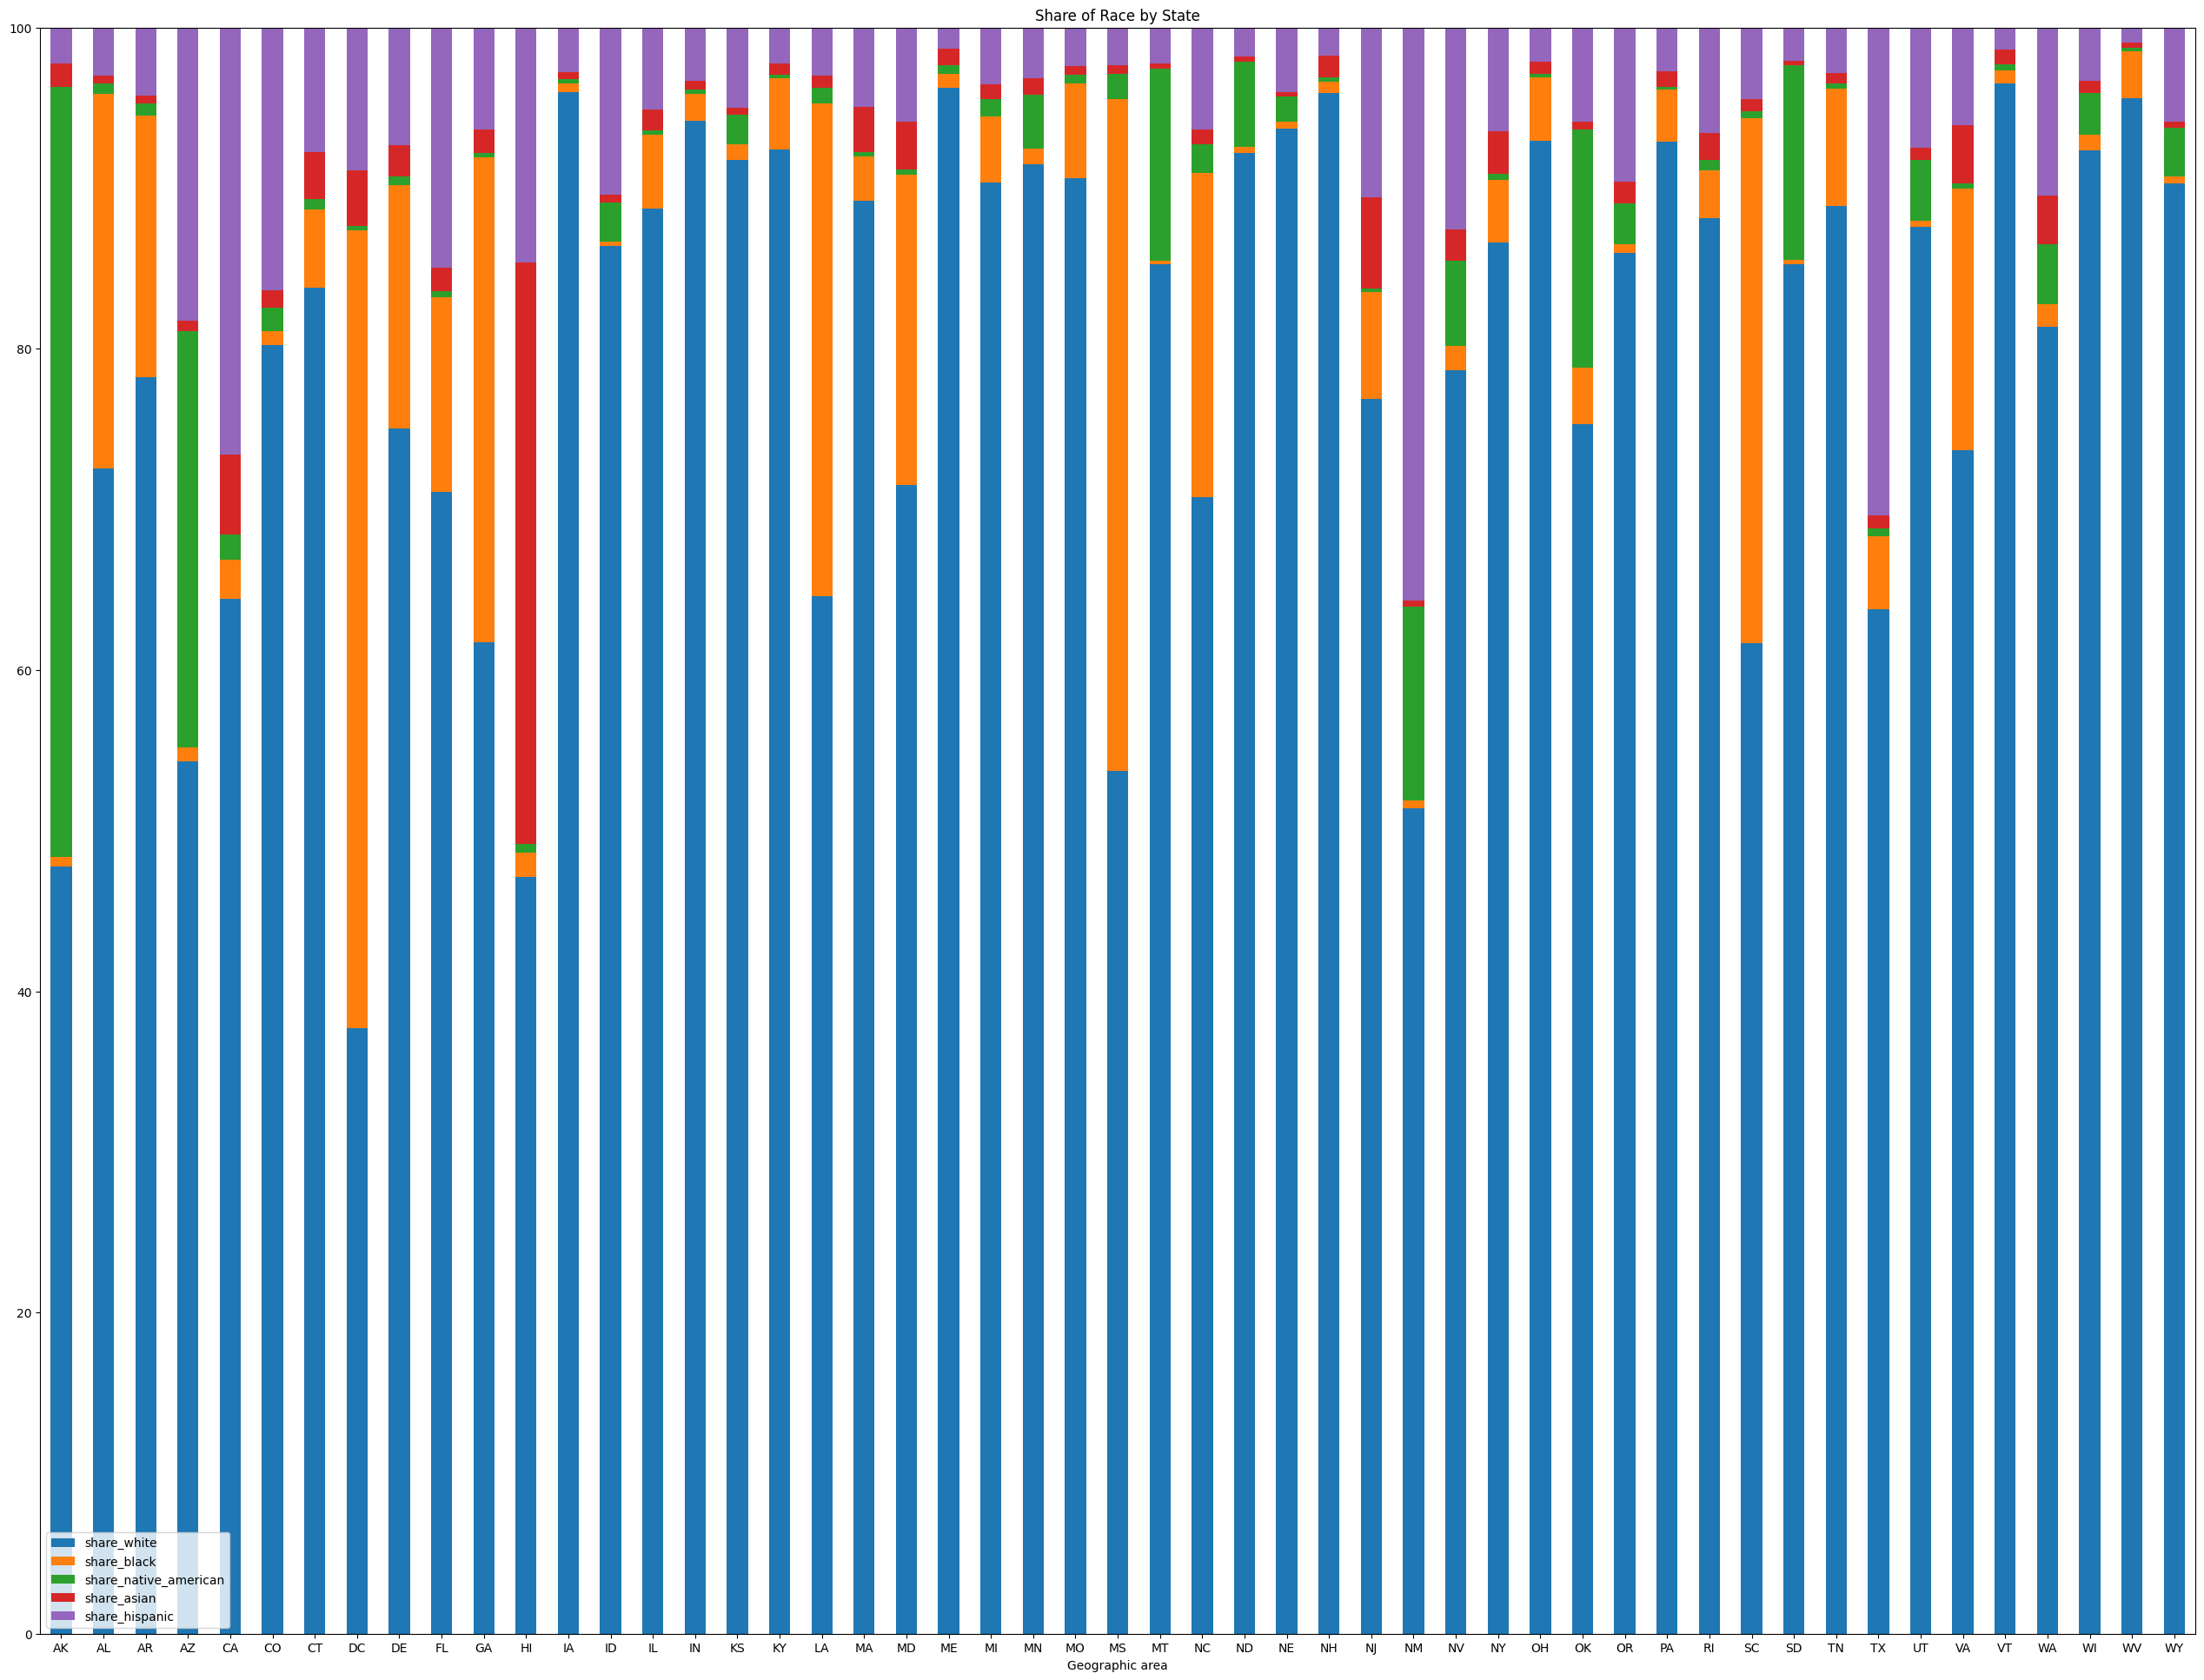

In [ ]:
race_by_state.plot(
    kind='bar',
    figsize = (32,24),
    title = 'Share of Race by State',
    rot=0,
    stacked=True,
    ylim=(0,100),
)

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
killed_by_race = df_fatalities.race.value_counts().rename({'W':'white', 'A':'asian', 'B':'black', 'H':'hispanic', 'O':'others', 'N':'native-american'})
killed_by_race

white              1201
black               618
hispanic            423
0                   195
asian                39
native-american      31
others               28
Name: race, dtype: int64

In [ ]:
px.pie(labels=killed_by_race.index, values=killed_by_race.values, names=killed_by_race.index, hole=0.5)

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [ ]:
comparision = df_fatalities['gender'].value_counts()

In [ ]:
px.pie(labels=comparision.index, values=comparision.values, names=comparision.index)

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:
# px.box(
#     df_fatalities[df_fatalities['gender']=='M'],
#     x='manner_of_death',
#     y='age',
#     color='manner_of_death',
#     title = 'Age and Manner of Death (Male)'
# )

In [ ]:
px.box(
    df_fatalities,
    x='manner_of_death',
    y='age',
    color='gender',
    title = 'Age and Manner of Death (Female)'
)

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
weapons = df_fatalities['armed'].value_counts()
weapons

gun                                 1398
knife                                373
vehicle                              177
unarmed                              171
undetermined                         117
                                    ... 
straight edge razor                    1
baseball bat and fireplace poker       1
bean-bag gun                           1
chain                                  1
pen                                    1
Name: armed, Length: 69, dtype: int64

In [ ]:
unarmed_pct = (weapons.unarmed / 254)*100
unarmed_pct

67.32283464566929

In [ ]:
plt.figure(figsize=(18,14))
px.bar(x=weapons.index[:10], y=weapons.values[:10])
# plt.xlabel('weapons')
# plt.ylabel('Killings')

<Figure size 1800x1400 with 0 Axes>

In [ ]:
armed_unarmed = pd.Series({
    'armed': len(df_fatalities[df_fatalities['armed'] != 'unarmed']),
    'unarmed': len(df_fatalities[df_fatalities['armed'] == 'unarmed'])
})

In [ ]:
armed_unarmed

armed      2364
unarmed     171
dtype: int64

In [ ]:
fig=px.pie(labels=armed_unarmed.index, names=armed_unarmed.index, values=armed_unarmed.values, hole=0.3)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
under_25 = df_fatalities.loc[df_fatalities['age'] < 25]
under_25.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
524,649,Mohammad Youssef Abdulazeez,2015-07-16,shot,gun,24.00,M,O,Chattanooga,TN,True,attack,Not fleeing,False
2358,2609,Joseph Godinez,2017-05-29,shot,vehicle,20.00,M,H,Vacaville,CA,False,attack,Car,True
2130,2376,Steven Valenzuela,2017-02-23,shot,gun,24.00,M,H,Reno,NV,False,other,Foot,False
201,221,Alice Brown,2015-03-17,shot,vehicle,24.00,F,W,San Francisco,CA,True,other,Not fleeing,False
2100,2342,Kenneth Lee Bailey,2017-02-15,shot,gun,24.00,M,B,Durham,NC,False,attack,Foot,False


In [ ]:
under_25pct = (len(under_25) / len(df_fatalities))*100
under_25pct

20.78895463510848

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

<Axes: xlabel='age', ylabel='Density'>

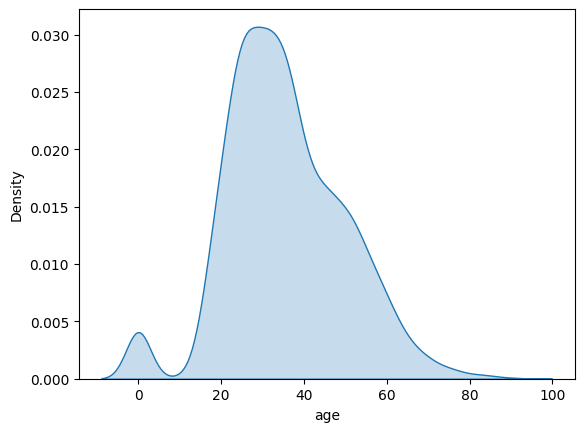

In [ ]:
sns.kdeplot(data=df_fatalities, x='age', fill=True)

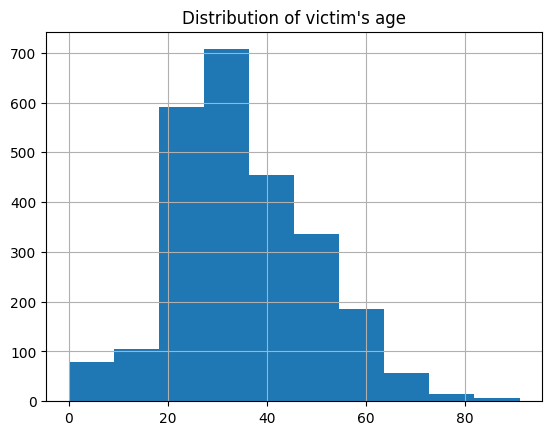

In [ ]:
plt.title("Distribution of victim's age")
df_fatalities['age'].hist()
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

<Axes: xlabel='age', ylabel='Density'>

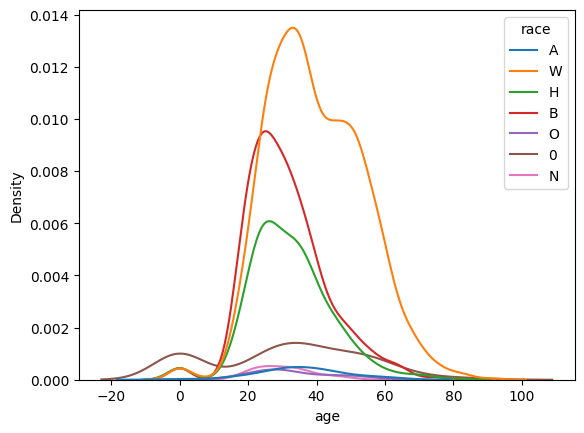

In [ ]:
sns.kdeplot(data=df_fatalities, x='age', hue='race')

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [ ]:
r = df_fatalities.race.value_counts()

In [ ]:
px.bar(x=r.index, y=r.values)

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
mental = df_fatalities['signs_of_mental_illness'].value_counts()

In [ ]:
px.pie(names=mental.index, values=mental.values)

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
top_10=df_fatalities['city'].value_counts().sort_values(ascending=False).head(10)
top_10

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

In [ ]:
px.bar(x=top_10.index, y=top_10.values)


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
df_fatalities.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False


In [ ]:
top_10_cities_by_race = df_fatalities[df_fatalities['city'].isin(top_10.index.tolist())].groupby(['city','race'])['name'].count().unstack(level=1)
top_10_cities_by_race.fillna(0, inplace=True)
top_10_cities_by_race.rename({'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native American','O':'Others'},axis=1, inplace=True)
top_10_cities_by_race

race,0,Asian,Black,Hispanic,Native American,Others,White
city,,,,,,,
Austin,0.00,0.00,3.00,2.00,0.00,0.00,13.00
Chicago,1.00,0.00,21.00,1.00,0.00,0.00,2.00
Columbus,1.00,0.00,11.00,0.00,0.00,1.00,6.00
Houston,1.00,1.00,15.00,6.00,1.00,0.00,3.00
Las Vegas,4.00,0.00,3.00,5.00,0.00,0.00,9.00
Los Angeles,3.00,1.00,10.00,19.00,0.00,0.00,6.00
Miami,1.00,0.00,8.00,6.00,0.00,0.00,3.00
Phoenix,3.00,0.00,2.00,11.00,3.00,0.00,12.00
San Antonio,2.00,0.00,3.00,12.00,0.00,0.00,3.00


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
dangerous_state = df_fatalities.groupby('state')['name'].count()
dangerous_state

state
AK     15
AL     50
AR     26
AZ    118
CA    424
CO     74
CT      9
DC     11
DE      8
FL    154
GA     70
HI     11
IA     12
ID     17
IL     62
IN     43
KS     24
KY     43
LA     57
MA     22
MD     38
ME     13
MI     37
MN     32
MO     64
MS     23
MT     11
NC     69
ND      4
NE     15
NH      7
NJ     35
NM     51
NV     42
NY     45
OH     79
OK     78
OR     38
PA     51
RI      2
SC     44
SD     10
TN     59
TX    225
UT     23
VA     47
VT      3
WA     62
WI     43
WV     27
WY      8
Name: name, dtype: int64

In [ ]:
death_by_state = df_fatalities['state'].value_counts().sort_index()
death_by_state

AK     15
AL     50
AR     26
AZ    118
CA    424
CO     74
CT      9
DC     11
DE      8
FL    154
GA     70
HI     11
IA     12
ID     17
IL     62
IN     43
KS     24
KY     43
LA     57
MA     22
MD     38
ME     13
MI     37
MN     32
MO     64
MS     23
MT     11
NC     69
ND      4
NE     15
NH      7
NJ     35
NM     51
NV     42
NY     45
OH     79
OK     78
OR     38
PA     51
RI      2
SC     44
SD     10
TN     59
TX    225
UT     23
VA     47
VT      3
WA     62
WI     43
WV     27
WY      8
Name: state, dtype: int64

In [ ]:
px.choropleth(dangerous_state, locations=dangerous_state.index, color=dangerous_state.values, color_continuous_scale='inferno',
              locationmode="USA-states",
              scope='usa',
              labels= {'color':'number of kills'})

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [ ]:
df_fatalities.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False


In [ ]:
killing_overtime = df_fatalities.groupby('date')['name'].count()
killing_overtime=killing_overtime.rolling(80).mean()

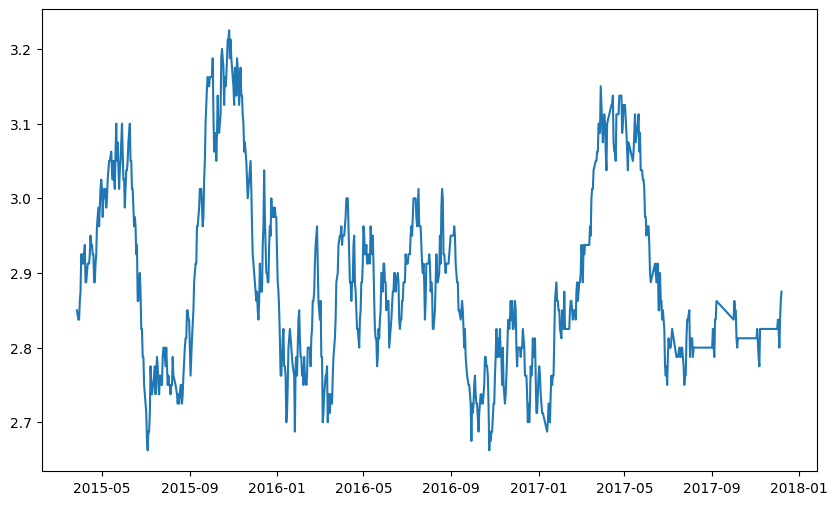

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(killing_overtime.index, killing_overtime.values)

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).